### imageex.ipynb

This notebook shows some of the different feature extraction methods tested on the SEM melt pool images

In [1]:
import skimage

In [2]:
import os
from skimage import io
from skimage import data
from skimage import filters
from skimage import segmentation
from skimage import feature
from skimage import color
from skimage import restoration
from skimage import measure
from skimage import draw
from PIL import Image
from skimage import *
import skimage.viewer
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import morphology

/home/idies/miniconda3/envs/py38/lib/python3.8/site-packages/skimage/viewer/utils/__init__.py:1: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  from .core import *


In [3]:
sample1=io.imread('semmp.png',as_gray=True) #this image is downloaded in the CDCS_xml notebook

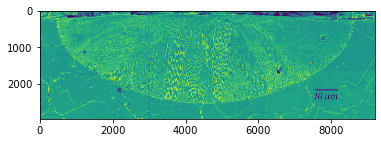

In [4]:
plt.imshow(sample1)

### Canny feature extraction

In [5]:
edges2=feature.canny(sample1,sigma=7)

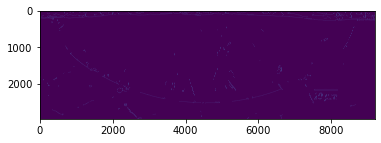

In [6]:
plt.imshow(edges2) #hard to see - the lines are very thin

In [7]:
io.imsave('cannysem.png',edges2)

<ipython-input-7-3efe7d21edb7>:1: UserWarning: cannysem.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('cannysem.png',edges2)
<ipython-input-7-3efe7d21edb7>:1: UserWarning: cannysem.png is a low contrast image
  io.imsave('cannysem.png',edges2)


- Probably not a good choice, since canny either detects extra, unneeded details, or nothing at all (depending on sigma)

### Chan Vese segmentation (with original image)

In [8]:
highercontrs=exposure.rescale_intensity(sample1) #increase intensity to make the borders of the regions more clear

In [9]:
higherhcontrs=exposure.rescale_intensity(highercontrs) #increasing intensity again

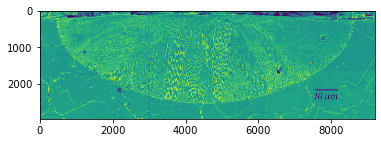

In [10]:
plt.imshow(higherhcontrs)

In [11]:
blurred3=filters.gaussian(higherhcontrs,sigma=15) #blurring so that the segmentation function will recognize the melt pool
#as one homogeneous region

In [12]:
region2=segmentation.morphological_chan_vese(blurred3,1) #1 iteration - gives a less detailed segment

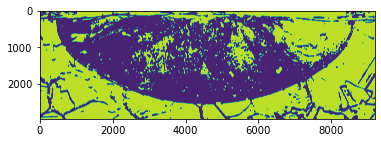

In [13]:
imgplot=plt.imshow(region2)

In [15]:
#trying less blur
blurred2=filters.gaussian(sample1,sigma=10)

In [16]:
region=segmentation.morphological_chan_vese(blurred2, 1)

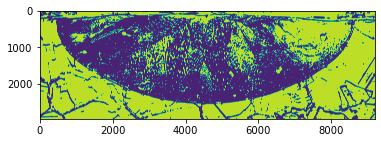

In [17]:
imgplot=plt.imshow(region)

- region leaves out parts that are differently textured
- region includes textural features of the background
- drawing a rectangle around the region would not give a good measure of the melt pool

### Chan Vese segmentation (with elevation map)

In [5]:
elevation_map=filters.sobel(sample1) #the elevation map has better contrast

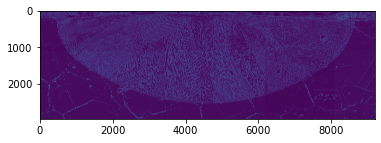

In [6]:
plt.imshow(elevation_map)

In [7]:
blurred4=filters.gaussian(elevation_map, sigma=9) #blurring again to try to get the melt pool as one homogeneous region

In [8]:
region4=segmentation.morphological_chan_vese(blurred4,1)

In [9]:
mask=np.array(region4, dtype='bool') #making a mask out of the segmentation result

In [10]:
invmask=np.invert(mask) #chan vese ends up marking the darker parts of the image as 'true' - I want the darker parts marked as
#'false' so that morphology looks at the lighter regions instead

In [11]:
importantpart=morphology.remove_small_objects(invmask,100000) #getting rid of the background bits that were highlighted
#by chan vese, leaving just the melt pool

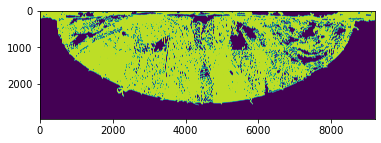

In [12]:
plt.imshow(importantpart) #will probably have to crop the image to get rid of the top extra stuff

In [13]:
cropim=importantpart[250:,:] #crop out the top stuff

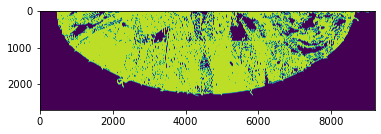

In [14]:
plt.imshow(cropim)

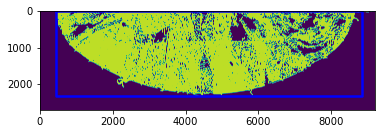

In [15]:
labels=measure.label(cropim) #turning the boolean np array back into a binary array
object_features=skimage.measure.regionprops(labels)
fig, ax = plt.subplots()
ax.imshow(cropim)
minr, minc, maxr, maxc = object_features[0].bbox #drawing a box around the region
bx = (minc, maxc, maxc, minc, minc)
by = (minr, minr, maxr, maxr, minr)
ax.plot(bx, by, '-b', linewidth=2.5)
plt.show()

- region includes some of the background elements at the top, but much better about excluding background elements at the bottom
- includes most of the melt pool